In [2]:
#import pygal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sns.set(rc={'figure.figsize':(10,10)})

In [3]:
data=pd.read_csv("Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
a=data['Attrition'].sum
print(a)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object>


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#data.drop(['BusinessTravel','DailyRate','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','MonthlyRate','Over18','OverTime','StandardHours','TrainingTimesLastYear','YearsWithCurrManager'],axis=1,inplace=True)
data.drop('EmployeeNumber',axis=1,inplace=True)

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [11]:
data.shape

(1470, 34)

In [12]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [13]:
data['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='Department', ylabel='count'>

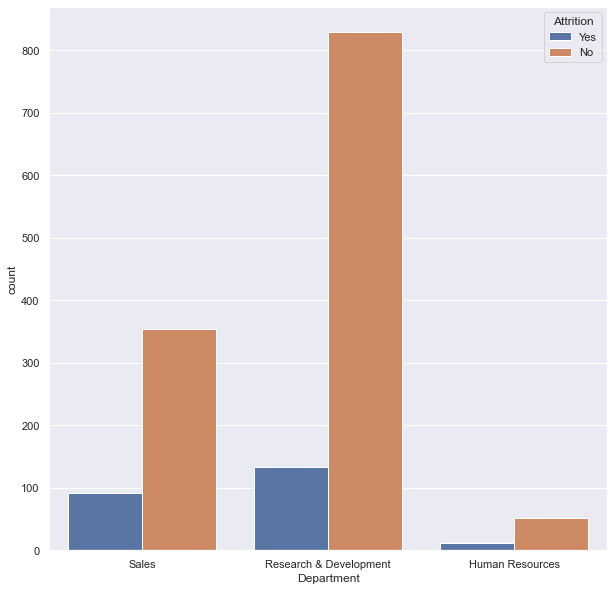

In [14]:
sns.countplot(x='Department',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

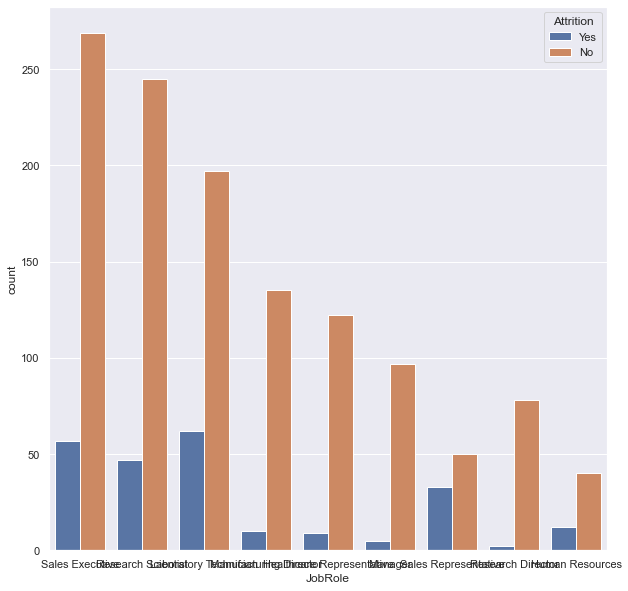

In [15]:
sns.countplot(x='JobRole',hue='Attrition',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

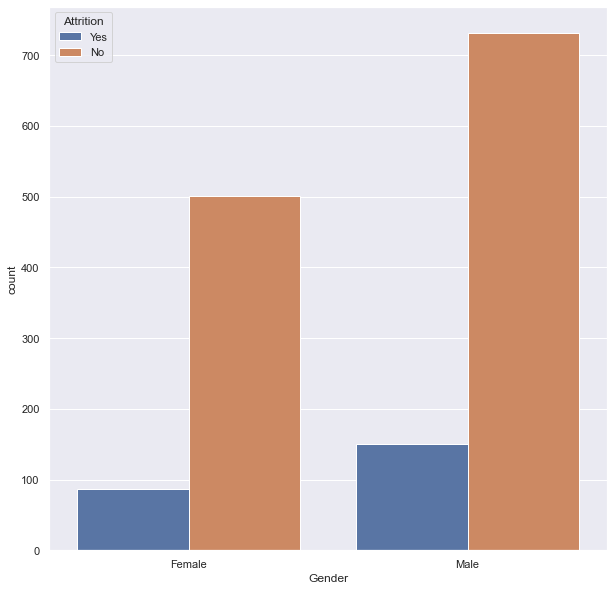

In [16]:
sns.countplot(x='Gender',hue='Attrition',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

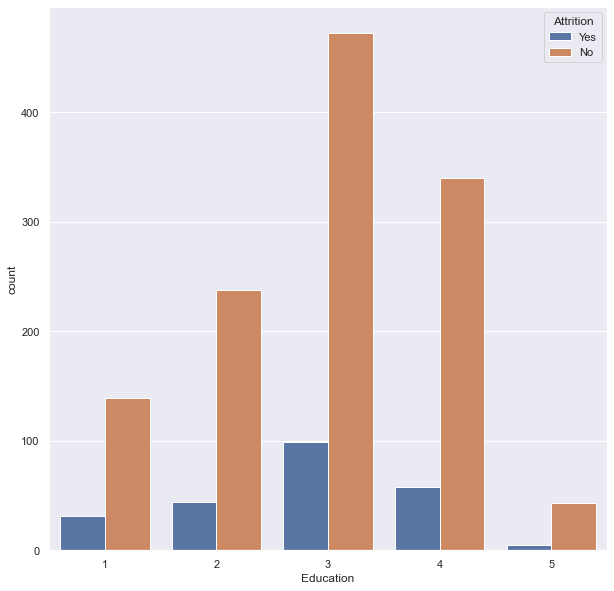

In [17]:
sns.countplot(x='Education',hue='Attrition',data=data)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

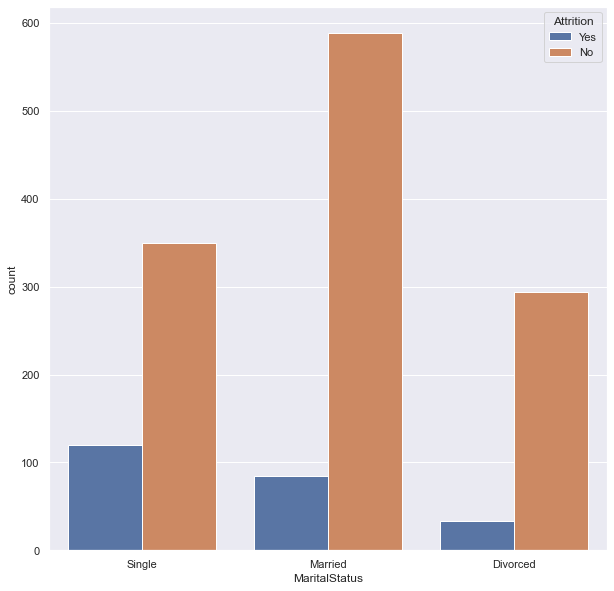

In [18]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

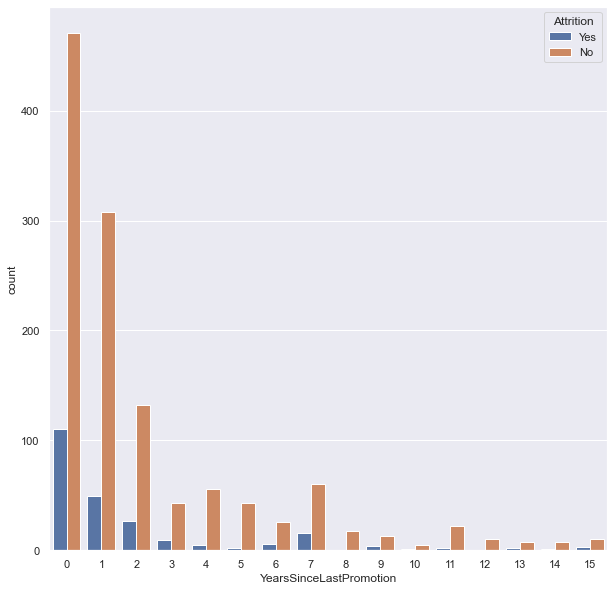

In [19]:
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data)


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

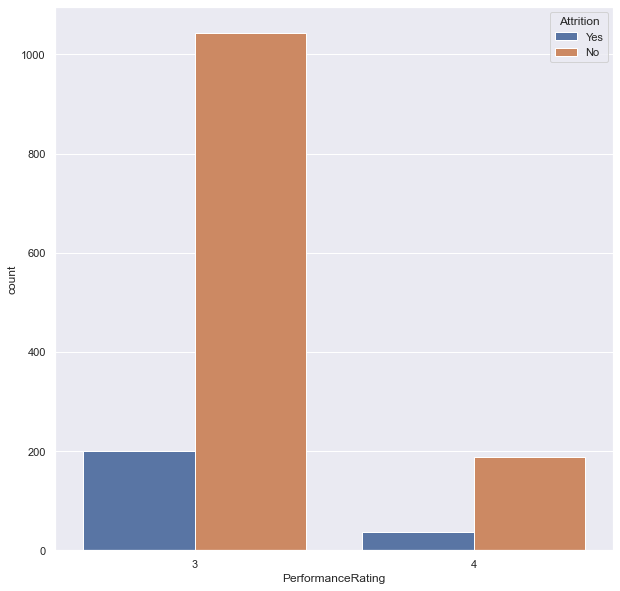

In [20]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=data)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

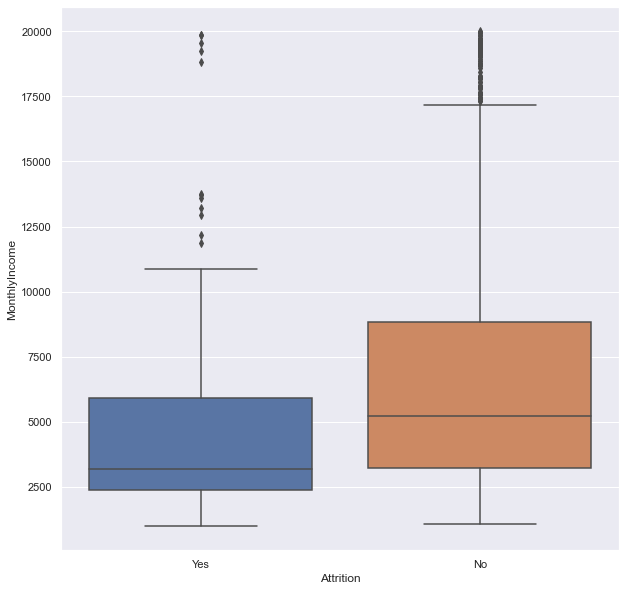

In [21]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)

In [22]:
sc=StandardScaler()
oe=OrdinalEncoder()

In [23]:
num_data=data.select_dtypes(include=np.number)
cat_data=data.select_dtypes(include=np.object)

In [24]:
num_df=pd.DataFrame(sc.fit_transform(num_data),columns=num_data.columns)
cat_df=pd.DataFrame(oe.fit_transform(cat_data),columns=cat_data.columns)
final=pd.concat([num_df,cat_df],axis=1)
final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,0.245834,1.0,2.0,2.0,1.0,0.0,7.0,2.0,0.0,1.0
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,0.806541,0.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,-1.155935,1.0,2.0,1.0,4.0,1.0,2.0,2.0,0.0,1.0
3,-0.429664,1.461466,-0.764121,1.061787,0.0,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,-1.155935,0.0,1.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,-0.595227,0.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,0.0


In [25]:
Y=final['Attrition']
x=final.drop('Attrition',axis=1)

In [26]:
KBest = SelectKBest(f_classif, k=14).fit(x, Y) 

C:\Users\music\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 4 16 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\music\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [27]:
f = KBest.get_support(1) #the most important features
X_new = x[x.columns[f]]

In [28]:
X_new.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [ ]:
final=final[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'MaritalStatus', 'OverTime','Attrition']]

In [ ]:
final.head()

In [ ]:
y=final['Attrition']
X=final.drop('Attrition',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

In [ ]:
y_prediction=model.predict(X_test)
print(y_prediction)

In [ ]:
testscore=model.score(X_test,y_test)
print(testscore)

In [ ]:
trainscore=model.score(X_train,y_train)
print(trainscore)

In [ ]:
conf_m = confusion_matrix(y_test, y_prediction)
print(conf_m)

In [ ]:
report = classification_report(y_test, y_prediction)
print(report)

In [ ]:
#x=[[41,3,1,1,0,1,2,1,1,1,5993,5,2,1,1,0,8,1,3,3,0]]
#print(model.predict(x))

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)

In [ ]:
score2=clf.score(X_test,y_test)
print(score2)

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

In [ ]:
#x=[[41,3,1,2,0,3,2,1,4,1,5993,8,11,3,1,0,8,1,6,4,0]]
#print(clf.predict(x))

In [ ]:
conf1 = confusion_matrix(y_test, y_pred)
print(conf1)

In [ ]:
report1 = classification_report(y_test, y_pred)
print(report1)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

In [ ]:
ypre=classifier.predict(X_test)
print(ypre)

In [ ]:
score3=classifier.score(X_test,y_test)
print(score3)

In [ ]:
#x=[[41,3,1,2,0,3,2,1,4,1,5993,8,11,3,1,0,8,1,6,4,0]]
#print(classifier.predict(x))

In [ ]:
conf2 = confusion_matrix(y_test, ypre)
print(conf2)

In [ ]:
report2 = classification_report(y_test, ypre)
print(report2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifi = DecisionTreeClassifier()
classifi.fit(X_train, y_train)

In [ ]:
y_pre1 = classifi.predict(X_test)
y_pre1

In [ ]:
score3=classifi.score(X_test,y_test)
print(score3)

In [ ]:
import pickle
Pkl_Filename = "attr.pkl"  
pickle.dump(clf, open(Pkl_Filename, 'wb'))

In [ ]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

In [ ]:
score = Pickled_LR_Model.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)  

Ypredict